# Audio Classification Model for Vehicle Identification

## Overview:
    This project aims to develop a model for classifying vehicle types using audio files as input data. The model's objective is to predict whether the sound corresponds to a car or a truck based on the audio features extracted from the files.

In [116]:
import json

# Read the text file
with open('traffic_data/snd/2024-02-24_h/traffic.txt.20240224', 'r') as file:
    lines = file.readlines()

# Initialize a list to store the parsed JSON documents
json_data = []

# Parse each line as JSON and add it to the list
for line in lines:
    # Strip any leading or trailing whitespace
    line = line.strip()
    # Parse the line as JSON
    json_doc = json.loads(line)
    # Append the parsed JSON document to the list
    json_data.append(json_doc)

# Print each JSON document
for doc in json_data:
    print(doc)
    print('\n')


{'cam': '109_high', 'probs': 0.93, 'cls': 2, 'dto': '2024-02-24 07:00:20.430000', 'save_dto': '2024-02-24 07:00:22.621455', 'point_len': 65, 'intersection': [142, 146], 'cross': [[125, 152], [148, 144]], 'box': [125.1167, 152.5862, 149.6789, 93.2738], 'frame_dto': '2024-02-24 07:00:20', 'snd': {'now': 1708776027.750936, 'diff': 0.12416410446166992, 'snd': 'traffic_data/snd/2024-02-24_h/070020_430000_.mp3', 'res': {'ks': 1708776018250, 'ke': 1708776023250, 'kd': 5000, 'dba': [73.33, 75.03, 75.58, 76.58, 78.6, 81.46, 81.93, 81.93, 85.52, 89.1, 88.36, 89.94, 91.45, 90.7, 86.53, 81.68, 78.37, 77.6, 75.59, 75.28, 75.29]}}, 'tid': 90, 'seq_len': 10, 'full_img': 'traffic_data/img/full/2024-02-24_h/070020_90.jpg', 'debug_img': 'traffic_data/img/debug/2024-02-24_h/070020_90.jpg', 'seq_path': '20240224_h/070020_90'}


{'cam': '109_low', 'probs': 0.91, 'cls': 2, 'dto': '2024-02-24 07:00:21.250000', 'save_dto': '2024-02-24 07:00:23.896820', 'point_len': 22, 'intersection': [230, 169], 'cross': [[2

###    Save the converted json into file and store it for further use

In [117]:
output_file = 'traffic_data/snd/2024-02-24_h/input_data.json'
with open(output_file, 'w') as output_file:
    json.dump(json_data, output_file)

In [159]:
import librosa
import matplotlib.pyplot as plt

def plot_soundwave(audio_path, duration=None):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=None, duration=duration)
    
    # Normalize the audio waveform
    y_normalized = librosa.util.normalize(y)
    
    # Calculate the time array
    time = librosa.times_like(y_normalized, sr=sr)
    
    # Plot the waveform
    plt.figure(figsize=(12, 4))
    plt.plot(time, y_normalized, color='b')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.title('Normalized Soundwave')
    plt.show()

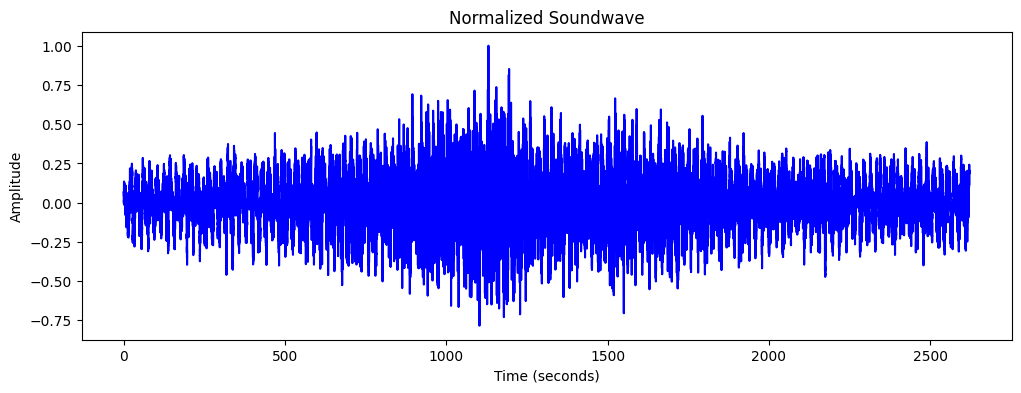

In [160]:
audio_path = './traffic_data/snd/2024-02-24_h/120200_930000_.mp3'
plot_soundwave(audio_path)



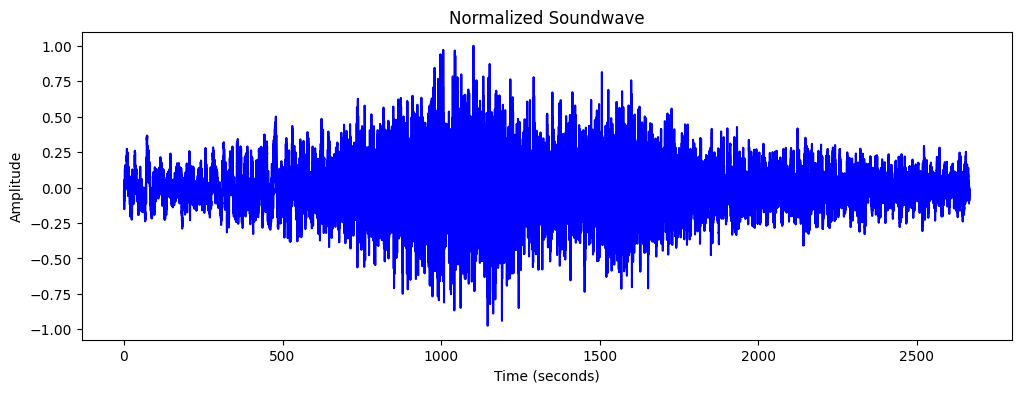

In [162]:
audio_path = './traffic_data/snd/2024-02-24_h/120148_520000_.mp3'
plot_soundwave(audio_path)


In [121]:
# audio_path = './traffic_data/snd/2024-02-24_h/120057_400000_.mp3'
# plot_soundwave(audio_path)

In [122]:
# audio_path = './traffic_data/snd/2024-02-24_h/120008_800000_.mp3'
# plot_soundwave(audio_path)

In [123]:
# audio_path = './traffic_data/snd/2024-02-24_h/113403_230000_.mp3'
# plot_soundwave(audio_path)

In [124]:
# audio_path = './traffic_data/snd/2024-02-24_h/120215_143000_.mp3'
# plot_soundwave(audio_path)

    Filter the json data to scan nested json and extract audio path of each audio file from the data

In [125]:
import pandas as pd

# Read JSON data into DataFrame
df = pd.read_json('./traffic_data/snd/2024-02-24_h/input_data.json')

df['audio_path'] = df['snd'].apply(lambda x: x.get('snd', None))
df.head()


,cam,probs,cls,dto,save_dto,point_len,intersection,cross,box,frame_dto,snd,tid,seq_len,full_img,debug_img,seq_path,audio_path
0,109_high,0.93,2,2024-02-24 07:00:20.430000,2024-02-24 07:00:22.621455,65,"[142, 146]","[[125, 152], [148, 144]]","[125.1167, 152.5862, 149.6789, 93.2738]",2024-02-24 07:00:20,"{'now': 1708776027.750936, 'diff': 0.124164104...",90,10,traffic_data/img/full/2024-02-24_h/070020_90.jpg,traffic_data/img/debug/2024-02-24_h/070020_90.jpg,20240224_h/070020_90,traffic_data/snd/2024-02-24_h/070020_430000_.mp3
1,109_low,0.91,2,2024-02-24 07:00:21.250000,2024-02-24 07:00:23.896820,22,"[230, 169]","[[203, 170], [236, 169]]","[203.8947, 170.228, 176.9891, 57.8822]",2024-02-24 07:00:21,"{'now': 1708776029.036237, 'diff': 0.134660005...",92,10,traffic_data/img/full/2024-02-24_l/070021_92.jpg,traffic_data/img/debug/2024-02-24_l/070021_92.jpg,20240224_l/070021_92,traffic_data/snd/2024-02-24_l/070021_250000_.mp3
2,109_high,0.87,7,2024-02-24 07:04:22.500000,2024-02-24 07:04:24.639123,57,"[124, 139]","[[111, 144], [127, 138]]","[111.5433, 144.2699, 162.1662, 115.676]",2024-02-24 07:04:22,"{'now': 1708776269.778868, 'diff': 0.134469032...",94,10,traffic_data/img/full/2024-02-24_h/070422_94.jpg,traffic_data/img/debug/2024-02-24_h/070422_94.jpg,20240224_h/070422_94,traffic_data/snd/2024-02-24_h/070422_500000_.mp3
3,109_low,0.86,7,2024-02-24 07:04:23.350000,2024-02-24 07:04:26.062604,23,"[230, 163]","[[207, 164], [237, 163]]","[207.5661, 164.3129, 197.6936, 70.2155]",2024-02-24 07:04:23,"{'now': 1708776271.19426, 'diff': 0.1263918876...",96,10,traffic_data/img/full/2024-02-24_l/070423_96.jpg,traffic_data/img/debug/2024-02-24_l/070423_96.jpg,20240224_l/070423_96,traffic_data/snd/2024-02-24_l/070423_350000_.mp3
4,109_high,0.84,2,2024-02-24 07:06:42.100000,2024-02-24 07:06:44.527100,71,"[119, 137]","[[102, 143], [121, 137]]","[102.251, 143.5726, 156.4261, 114.0958]",2024-02-24 07:06:42,"{'now': 1708776409.657585, 'diff': 0.125061988...",98,10,traffic_data/img/full/2024-02-24_h/070642_98.jpg,traffic_data/img/debug/2024-02-24_h/070642_98.jpg,20240224_h/070642_98,traffic_data/snd/2024-02-24_h/070642_100000_.mp3


    To preprocess the dataset, we are filtering out rows where the audio file path does not exist, ensuring that only valid audio data is included for further analysis.

In [126]:
# Drop Null values for audio path
df = df.dropna(subset=['audio_path'])

In [127]:
import os

# Filter out rows where the audio file doesn't exist

df = df[df['audio_path'].apply(lambda path: os.path.exists(path))]

## Preprocessing Audio Files
    In the preprocessing stage, we filter the JSON dataset to include only rows corresponding to vehicle classes 2 (cars) and 7 (trucks), discarding other classes. This step ensures that our training data is focused on the target vehicle types.

    To filter the DataFrame for vehicle classification, use the 'cls' column to retain only entries representing cars or trucks.


In [128]:
df = df[(df['cls'] == 2) | (df['cls'] == 7)]
len(df)

1051

    Just checking if the number of audio files referenced in the dataframe exists in the data

In [129]:
import os

# Filter out rows where the audio file doesn't exist
df_filtered = df.dropna(subset=['audio_path'])

# Extract unique audio file names from the dataframe
audio_files_in_json = df_filtered['audio_path'].apply(lambda path: os.path.basename(path))
print(len(audio_files_in_json))
unique_audio_files_in_json = set(audio_files_in_json)

# List all available audio files in the directory
all_audio_files = os.listdir('traffic_data/snd/2024-02-24_h')

# Count the number of unique audio files referenced in JSON data that are present in the directory
count = sum(file in all_audio_files for file in unique_audio_files_in_json)

# Print the count
print("Number of unique audio files referenced in JSON data and present in directory:", count)


1051
Number of unique audio files referenced in JSON data and present in directory: 1036


### Drop the duplicates
    In the previous code chunk, we can see that length of df and number of auido files actually are different, so let's drop the duplicates

In [130]:
# Remove duplicate entries from the DataFrame based on the 'audio_path' column
df = df.drop_duplicates(subset=['audio_path'])

## Feature Selection

In [139]:
import librosa
import numpy as np

def extract_features(audio_path, max_length=100):
    y, sr = librosa.load(audio_path, sr=None)
    y_normalized = librosa.util.normalize(y)
    segments = librosa.effects.split(y_normalized, top_db=20)
    
    mfccs = []
    for start, end in segments:
        segment = y[start:end]
        mfcc = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=13)
        if mfcc.shape[1] > max_length:
            mfcc = mfcc[:, :max_length]
        else:
            pad_width = max_length - mfcc.shape[1]
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        mfccs.append(mfcc)
    
    return mfccs

# Initialize lists to store features and labels
all_features = []
all_labels = []

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    # Extract features for the current audio file
    features = extract_features(row['audio_path'])
    
    # Extend the lists with the features and corresponding label
    all_features.extend(features)
    all_labels.extend([row['cls']] * len(features))

/opt/homebrew/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1536
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(


## SVM Model

In [140]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import librosa


# Convert the lists to numpy arrays
X = np.array(all_features)
y = np.array(all_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Reshape the feature matrices for SVM
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


X_train shape: (2479, 13, 100)
X_test shape: (620, 13, 100)
y_train shape: (2479,)
y_test shape: (620,)


In [141]:
# Model Training
svm_model = SVC(kernel='linear') 
svm_model.fit(X_train_flat, y_train)

SVC(kernel='linear')

In [142]:
# Model Evaluation
y_pred = svm_model.predict(X_test_flat)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.77      0.78      0.77       455
           7       0.37      0.37      0.37       165

    accuracy                           0.67       620
   macro avg       0.57      0.57      0.57       620
weighted avg       0.67      0.67      0.67       620



In [148]:
def predict_using_svm_model(audio_path):
    features = extract_features(audio_path)

    # Reshape features for prediction
    features = np.array(features).reshape(1, -1)

    # Make predictions using the SVM model
    prediction = svm_model.predict(features)

    # Print the filename and predicted class
    print(f"File: {audio_path}, Predicted Class: {prediction}")

In [163]:
audio_path = 'traffic_data/snd/2024-02-24_h/120036_300000_.mp3'
predict_using_svm_model(audio_path)


File: traffic_data/snd/2024-02-24_h/120036_300000_.mp3, Predicted Class: [7]


In [165]:
audio_path = 'traffic_data/snd/2024-02-24_h/113835_400000_.mp3'
predict_using_svm_model(audio_path)


File: traffic_data/snd/2024-02-24_h/113835_400000_.mp3, Predicted Class: [2]


In [166]:
audio_path = 'traffic_data/snd/2024-02-24_h/113445_748000_.mp3'
predict_using_svm_model(audio_path)

File: traffic_data/snd/2024-02-24_h/113445_748000_.mp3, Predicted Class: [7]


## Neural Networks Model

In [136]:
X_train_features, X_test_features = X_train, X_test

# Normalize the features
X_train_features = (X_train_features - np.mean(X_train_features)) / np.std(X_train_features)
X_test_features = (X_test_features - np.mean(X_train_features)) / np.std(X_train_features)

# Convert class labels to one-hot encoded vectors
num_classes = len(np.unique(y_train))
y_train_one_hot = pd.get_dummies(y_train).values
y_test_one_hot = pd.get_dummies(y_test).values

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Define the neural network architecture
model = Sequential([
    Flatten(input_shape=(X_train_features.shape[1:])),  # Flatten the input features
    Dense(256, activation='relu'),  # Dense layer with 256 units and ReLU activation
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 1300)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       333,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,570 (1.27 MB)

 Trainable params: 333,570 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [143]:
# Train the model
nn_model = model.fit(X_train_features, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)
nn_model


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6549 - loss: 0.9228 - val_accuracy: 0.6935 - val_loss: 0.6370
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7020 - loss: 0.6139 - val_accuracy: 0.6956 - val_loss: 0.5887
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7069 - loss: 0.5672 - val_accuracy: 0.6915 - val_loss: 0.5887
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7286 - loss: 0.5462 - val_accuracy: 0.7016 - val_loss: 0.5793
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7242 - loss: 0.5604 - val_accuracy: 0.7097 - val_loss: 0.5694
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7263 - loss: 0.5423 - val_accuracy: 0.7036 - val_loss: 0.5780
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7270 - loss: 0.5471 - val_accuracy: 0.6895 - val_loss: 0.5752
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7321 - loss: 0.5406 - val_accuracy: 0.6976 - val_loss:

In [158]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test_features, y_test_one_hot)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7486 - loss: 14.2151 
Test Loss: 14.920332908630371
Test Accuracy: 0.7435483932495117


In [63]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

def preprocess_audio(audio_path, target_sr=22050, n_mfcc=13):
    """Load audio file, normalize, and extract MFCC features."""
    # Load audio file
    y, sr = librosa.load(audio_path, sr=target_sr)

    time = librosa.times_like(y, sr=sr)
    
    # Normalize audio waveform
    y_normalized = librosa.util.normalize(y)

    # Extract Mel-Frequency Cepstral Coefficients (MFCCs)
    mfccs = librosa.feature.mfcc(y=y_normalized, sr=sr, n_mfcc=n_mfcc)

    return y, time, mfccs

y, time, mfccs = preprocess_audio('traffic_data/snd/2024-02-24_h/120033_900000_.mp3')

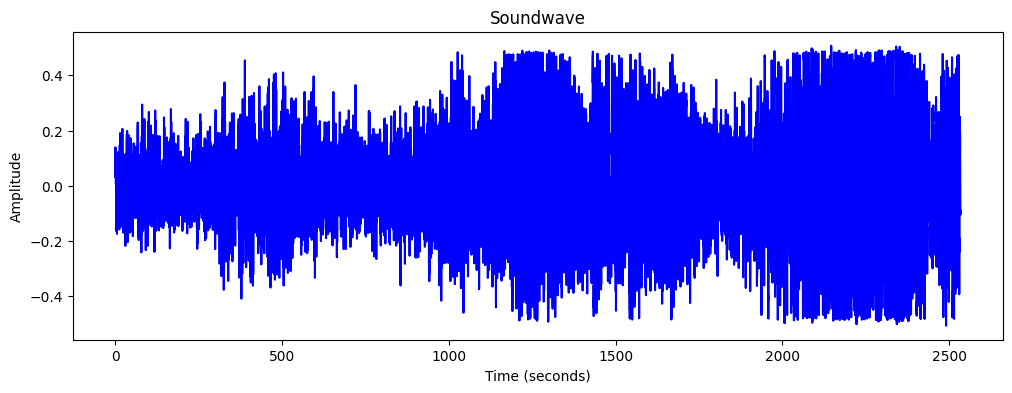

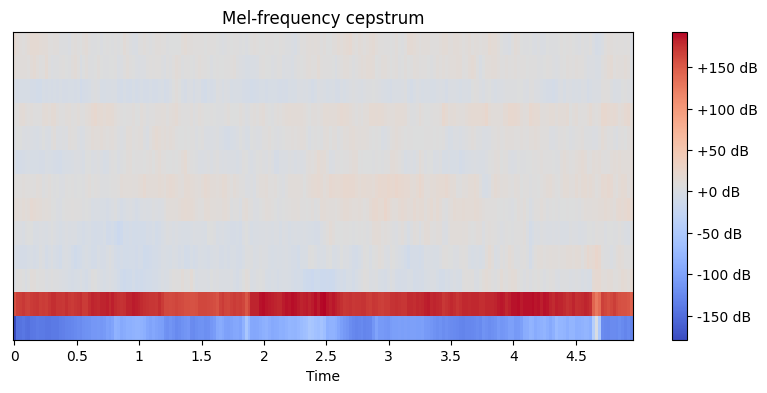

In [64]:

plt.figure(figsize=(12, 4))
plt.plot(time, y, color='b')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Soundwave')
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency cepstrum')
plt.show()